In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

# Population Correlation Coefficient

For a pair of random variables, $(X, Y)$, the correlation coefficient, 
$\rho$, is defined as:

$$\rho(X,Y) = \frac{cov(X,Y)}{\sigma_X\sigma_Y}$$

where $cov$ is the covariance, $\sigma_X$ is the standard deviation of $X$,
and $\sigma_Y$ is the standard deviation of $Y$.

Essentially, the correlation coecient is a measure of linear dependence
between $X$ and $Y$.

The correlation coefficient can have values from -1 to 1:
- $\rho = 1$: implies that a linear equation with positive slope can 
describe the relationship between $X$ and $Y$ exactly. 
- $\rho = -1$: implies that a linear equation with negative slope can 
describe the relationship between $X$ and $Y$ exactly. 
- $\rho = 0$: implies that there is no linear correlation between $X$ and $Y$. 


More about the correlation coefficient and the covariance at
[correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)


In [3]:
# generate normally distributed random variables that are 

x = np.random.randn(10000)
y = x + np.random.randn(10000)

In [4]:
# generate normally distributed random variables that are
# uncorrelated and quadratically dependent
x2 = np.random.randn(10000)
y2 = x2**2 + np.random.randn(10000)

# Correlation Matrix

Interpreting the correlation matrix for random variables $(X,Y)$: 
- diagonal elements are 1 i.e. $X$ is perfectly correlated to $X$
and $Y$ is perfectly correlated to $Y$
- the off-diagonal elements are the correlation coefficients of $X$ and $Y$

In the linear case, the we expect the correlation coefficient to be high 
between $X$ and $Y$ (in theory, it would be 1 if there were no noise).

In [5]:
# calculate correlation matrix for X = Y
rho_lin = np.corrcoef(x, y)
rho_lin


array([[1.        , 0.71204391],
       [0.71204391, 1.        ]])

In the quadratic case, we expect the the correlation coecient to be low, 
because the Gaussian random variable $X$ is not linearly related to $Y$ and 
has zero skewness and zero mean.


In [6]:
# calculate correlation matrix for X = Y^2
rho_quad = np.corrcoef(x2, y2)
rho_quad

array([[1.       , 0.0124863],
       [0.0124863, 1.       ]])

In [7]:
rho_lin = rho_lin[0,1]
rho_quad = rho_quad[0,1]
rho_lin, rho_quad

(0.7120439097507917, 0.01248630238324107)

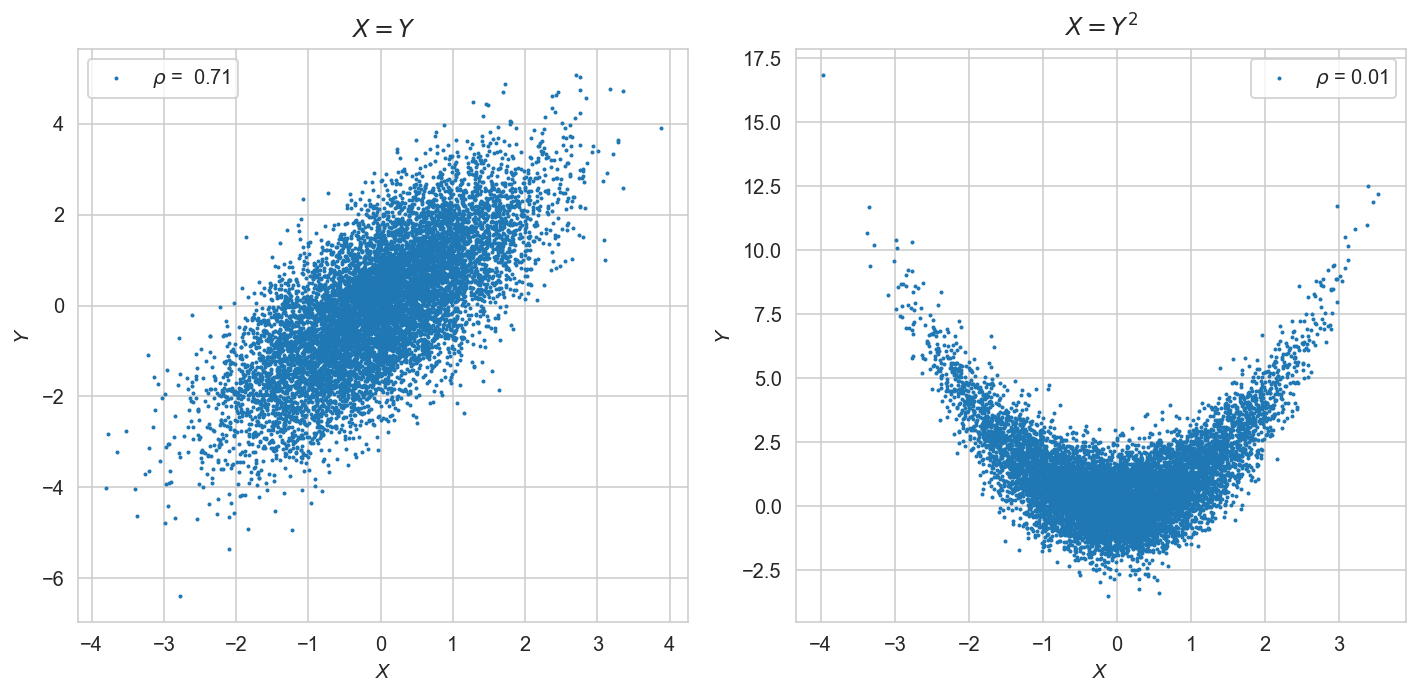

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, s=1, label = r'$\rho$ = ' + f'{rho_lin: .2f}')
ax[0].set_ylabel('$Y$')
ax[0].set_xlabel('$X$')
ax[0].set_title('$X = Y$')
ax[0].legend()
ax[1].scatter(x2, y2, s=1, label = r'$\rho$ =' + f'{rho_quad: .2f}')
ax[1].set_ylabel('$Y$')
ax[1].set_xlabel('$X$')
ax[1].set_title(r'$X = Y^2$')
ax[1].legend()

fig.tight_layout();